<a href="https://colab.research.google.com/github/HowardHNguyen/EDA/blob/main/EDA_Measure_and_Prepare_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Within a week of receiving a new dataset, at least one person is likely to ask us a familiar question – “so, how does it look?” This is not always asked relaxedly, and others are not usually excited to hear about all of the red flags we have already found. There might be a sense of urgency to declare the data ready for analysis. Of course, if we sign off on it too soon, this can create much larger problems; the presentation of invalid results, the misinterpretation of variable relationships, and having to redo major chunks of our analysis. The key is sorting out what we need to know about the data before we explore anything else in the data. These works offer techniques for determining if the data is in good enough shape to begin the analysis, so that even if we cannot say, “it looks fine,” we can at least say, “I’m pretty sure I have identified the main issues, and here they are.”

Often our domain knowledge is quite limited, or at least not nearly as good as those who created the data. We have to quickly get a sense of what we are looking at even when we have little substantive understanding of the individuals or events reflected in the data. Many times (for some of us, most of the time) there is not anything like a data dictionary or codebook accompanying the receipt of the data.

We will work with two datasets in this section: The National Longitudinal Survey of Youth for 1997, a survey conducted by the United States government that surveyed the same group of individuals from 1997 through 2023; and the counts of COVID-19 cases and deaths by country from Our World in Data.

**Data note**

The NLS of Youth was conducted by the United States Bureau of Labor Statistics. This survey started with a cohort of individuals in 1997 who were born between 1980 and 1985, with annual follow-ups each year through to 2023. For this recipe, I pulled 89 variables on grades, employment, income, and attitudes toward government from the hundreds of data items in the survey. Separate files for SPSS, Stata, and SAS can be downloaded from the repository. The NLS data can be downloaded from https://www.nlsinfo.org. You must create an investigator account to download the data, but there is no charge.

Our World in Data provides COVID-19 public use data at https://ourworldindata.org/covid-cases. The dataset includes total cases and deaths, tests administered, hospital beds, and demographic data such as median age, gross domestic product, and a human development index, which is a composite measure of standard of living, educational levels, and life expectancy. The dataset used in this recipe was downloaded on March 3, 2024

## Preparing data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import pandas, numpy
import pandas as pd
pd.set_option('display.width', 70)
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:,.0f}'.format

In [ ]:
nls97 = pd.read_csv("data/nls97.csv")
covidtotals = pd.read_csv("data/covidtotals.csv",
  parse_dates=['lastdate'])

FileNotFoundError: [Errno 2] No such file or directory: 'data/nls97.csv'

In [ ]:
nls97 = pd.read_csv("/content/drive/MyDrive/_Python/Python-Data-Cleaning/3. TakingMeasureOfData/data/nls97.csv")
nls97

,personid,gender,...,colenrfeb17,colenroct17
0,100061,Female,...,1. Not enrolled,1. Not enrolled
1,100139,Male,...,1. Not enrolled,1. Not enrolled
2,100284,Male,...,1. Not enrolled,1. Not enrolled
3,100292,Male,...,NaN,NaN
4,100583,Male,...,1. Not enrolled,1. Not enrolled
...,...,...,...,...,...
8979,999291,Female,...,1. Not enrolled,1. Not enrolled
8980,999406,Male,...,1. Not enrolled,1. Not enrolled
8981,999543,Female,...,1. Not enrolled,1. Not enrolled
8982,999698,Female,...,1. Not enrolled,1. Not enrolled


In [ ]:
covidtotals = pd.read_csv("/content/drive/MyDrive/_Python/Python-Data-Cleaning/3. TakingMeasureOfData/data/covidtotals.csv",parse_dates=['lastdate'])
covidtotals

,iso_code,lastdate,...,hum_dev_ind,region
0,AFG,2024-02-04,...,1,South Asia
1,ALB,2024-01-28,...,1,Eastern Europe
2,DZA,2023-12-03,...,1,North Africa
3,ASM,2023-09-17,...,NaN,Oceania / Aus
4,AND,2023-05-07,...,1,Western Europe
...,...,...,...,...,...
226,VNM,2023-10-22,...,1,East Asia
227,WLF,2023-06-04,...,NaN,Oceania / Aus
228,YEM,2022-11-06,...,0,West Asia
229,ZMB,2023-12-03,...,1,Southern Africa


In [ ]:
# Get basic stats on the nls dataset
nls97.set_index("personid", inplace=True)

In [ ]:
nls97.index

Index([100061, 100139, 100284, 100292, 100583, 100833, 100931,
       101089, 101122, 101132,
       ...
       998997, 999031, 999053, 999087, 999103, 999291, 999406,
       999543, 999698, 999963],
      dtype='int64', name='personid', length=8984)

In [ ]:
nls97.shape

(8984, 88)

In [ ]:
nls97.index.nunique()

8984

In [ ]:
nls97.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8984 entries, 100061 to 999963
Data columns (total 88 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 8984 non-null   object 
 1   birthmonth             8984 non-null   int64  
 2   birthyear              8984 non-null   int64  
 3   highestgradecompleted  6663 non-null   float64
 4   maritalstatus          6672 non-null   object 
 5   childathome            4791 non-null   float64
 6   childnotathome         4791 non-null   float64
 7   wageincome             5091 non-null   float64
 8   weeklyhrscomputer      5792 non-null   object 
 9   weeklyhrstv            6711 non-null   object 
 10  nightlyhrssleep        6706 non-null   float64
 11  satverbal              1406 non-null   float64
 12  satmath                1407 non-null   float64
 13  gpaoverall             6004 non-null   float64
 14  gpaenglish             5798 non-null   float64
 15  gp

In [ ]:
nls97.head(2).T

personid,100061,100139
gender,Female,Male
birthmonth,5,9
birthyear,1980,1983
highestgradecompleted,13,12
maritalstatus,Married,Married
...,...,...
colenroct15,1. Not enrolled,1. Not enrolled
colenrfeb16,1. Not enrolled,1. Not enrolled
colenroct16,1. Not enrolled,1. Not enrolled
colenrfeb17,1. Not enrolled,1. Not enrolled


In [ ]:
# Get basic stats on the covid cases dataset
covidtotals.set_index("iso_code", inplace=True)
covidtotals.index
covidtotals.shape
covidtotals.index.nunique()
covidtotals.info()
covidtotals.sample(2, random_state=1).T

<class 'pandas.core.frame.DataFrame'>
Index: 231 entries, AFG to ZWE
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   lastdate         231 non-null    datetime64[ns]
 1   location         231 non-null    object        
 2   total_cases      231 non-null    float64       
 3   total_deaths     231 non-null    float64       
 4   total_cases_pm   231 non-null    float64       
 5   total_deaths_pm  231 non-null    float64       
 6   population       231 non-null    int64         
 7   pop_density      209 non-null    float64       
 8   median_age       194 non-null    float64       
 9   gdp_per_capita   191 non-null    float64       
 10  hosp_beds        170 non-null    float64       
 11  vac_per_hund     13 non-null     float64       
 12  aged_65_older    188 non-null    float64       
 13  life_expectancy  227 non-null    float64       
 14  hum_dev_ind      187 non-null    float64     

iso_code,GHA,NIU
lastdate,2023-12-03 00:00:00,2023-12-31 00:00:00
location,Ghana,Niue
total_cases,"171,834",993
total_deaths,"1,462",0
total_cases_pm,"5,133","508,709"
total_deaths_pm,44,0
population,33475870,1952
pop_density,127,NaN
median_age,21,NaN
gdp_per_capita,"4,228",NaN


## Selecting and organizing columns
We explore several ways to select one or more columns from your DataFrame in this recipe. We can select columns by passing a list of column names to the [] bracket operator, or by using the pandas-specific loc and iloc data accessors.

When cleaning data or doing exploratory or statistical analyses, it is helpful to focus on the variables that are relevant to the issue or analysis at hand. This makes it important to group columns according to their substantive or statistical relationships with each other, or to limit the columns we are investigating at any one time. How many times have we said to ourselves something like, “Why does variable A have a value of x when variable B has a value of y?” We can only do that when the amount of data we are viewing at a given moment does not exceed our perceptive abilities at that moment.

In [ ]:
# import pandas and numpy, and load the nls97 data
import pandas as pd
pd.set_option('display.width', 78)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 15)
pd.options.display.float_format = '{:,.0f}'.format
nls97 = pd.read_csv("/content/drive/MyDrive/_Python/Python-Data-Cleaning/3. TakingMeasureOfData/data/nls97.csv")
nls97.set_index("personid", inplace=True)

nls97[nls97.select_dtypes(['object']).columns] = nls97.select_dtypes(['object']). \
  transform(lambda x: x.astype('category'))

In [ ]:
# select a column using the pandas index operator
analysisdemo = nls97['gender']
type(analysisdemo)

pandas.core.series.Series

In [ ]:
analysisdemo = nls97[['gender']]
type(analysisdemo)

pandas.core.frame.DataFrame

In [ ]:
analysisdemo = nls97.loc[:,['gender']]
type(analysisdemo)

pandas.core.frame.DataFrame

In [ ]:
analysisdemo = nls97.iloc[:,[0]]
type(analysisdemo)

pandas.core.frame.DataFrame

In [ ]:
# select multiple columns from a pandas data frame
analysisdemo = nls97[['gender','maritalstatus','highestgradecompleted']]
analysisdemo.shape

(8984, 3)

In [ ]:
analysisdemo.head()

,gender,maritalstatus,highestgradecompleted
personid,,,
100061,Female,Married,13
100139,Male,Married,12
100284,Male,Never-married,7
100292,Male,NaN,NaN
100583,Male,Married,13


In [ ]:
analysisdemo = nls97.loc[:,['gender','maritalstatus','highestgradecompleted']]
analysisdemo.shape

(8984, 3)

In [ ]:
analysisdemo.head()

,gender,maritalstatus,highestgradecompleted
personid,,,
100061,Female,Married,13
100139,Male,Married,12
100284,Male,Never-married,7
100292,Male,NaN,NaN
100583,Male,Married,13


**Select multiple columns based on a list of columns.**

If we are selecting more than a few columns, it is helpful to create a list of column names separately. Here, we create a keyvars list of key variables for analysis:

In [ ]:
# use lists to select multiple columns
keyvars = ['gender','maritalstatus',
 'highestgradecompleted','wageincome',
 'gpaoverall','weeksworked17','colenroct17']
analysiskeys = nls97[keyvars]
analysiskeys.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8984 entries, 100061 to 999963
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 8984 non-null   category
 1   maritalstatus          6672 non-null   category
 2   highestgradecompleted  6663 non-null   float64 
 3   wageincome             5091 non-null   float64 
 4   gpaoverall             6004 non-null   float64 
 5   weeksworked17          6670 non-null   float64 
 6   colenroct17            6734 non-null   category
dtypes: category(3), float64(4)
memory usage: 377.8 KB


In [ ]:
# select multiple columns using the filter operator
analysiswork = nls97.filter(like="weeksworked")
analysiswork.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8984 entries, 100061 to 999963
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   weeksworked00  8603 non-null   float64
 1   weeksworked01  8564 non-null   float64
 2   weeksworked02  8556 non-null   float64
 3   weeksworked03  8490 non-null   float64
 4   weeksworked04  8458 non-null   float64
 5   weeksworked05  8403 non-null   float64
 6   weeksworked06  8340 non-null   float64
 7   weeksworked07  8272 non-null   float64
 8   weeksworked08  8186 non-null   float64
 9   weeksworked09  8146 non-null   float64
 10  weeksworked10  8054 non-null   float64
 11  weeksworked11  7968 non-null   float64
 12  weeksworked12  7747 non-null   float64
 13  weeksworked13  7680 non-null   float64
 14  weeksworked14  7612 non-null   float64
 15  weeksworked15  7389 non-null   float64
 16  weeksworked16  7068 non-null   float64
 17  weeksworked17  6670 non-null   float64
dtypes: flo

In [ ]:
analysiswork.head().T

personid,100061,100139,100284,100292,100583
weeksworked00,46,5,5,29,53
weeksworked01,52,49,8,34,52
weeksworked02,52,52,52,52,52
weeksworked03,48,52,35,31,52
weeksworked04,52,52,40,52,48
...,...,...,...,...,...
weeksworked13,52,52,NaN,52,27
weeksworked14,52,52,11,52,3
weeksworked15,52,52,52,52,52
weeksworked16,48,53,47,4,53


In [ ]:
# select multiple columns based on data types
analysiscats = nls97.select_dtypes(include=["category"])
analysiscats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8984 entries, 100061 to 999963
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 8984 non-null   category
 1   maritalstatus          6672 non-null   category
 2   weeklyhrscomputer      5792 non-null   category
 3   weeklyhrstv            6711 non-null   category
 4   highestdegree          8953 non-null   category
 5   govprovidejobs         1833 non-null   category
 6   govpricecontrols       1859 non-null   category
 7   govhealthcare          1874 non-null   category
 8   govelderliving         1872 non-null   category
 9   govindhelp             1815 non-null   category
 10  govunemp               1811 non-null   category
 11  govincomediff          1775 non-null   category
 12  govcollegefinance      1875 non-null   category
 13  govdecenthousing       1847 non-null   category
 14  govprotectenvironment  1860 non-null  

**Organize columns using lists of column names.**

Use lists to organize the columns in your DataFrame. You can easily change the order of columns or exclude some columns in this way. Here, we move the columns in the demoadult list to the front:

In [ ]:
# organize columns
demo = ['gender','birthmonth','birthyear']
highschoolrecord = ['satverbal','satmath','gpaoverall',
 'gpaenglish','gpamath','gpascience']
govresp = ['govprovidejobs','govpricecontrols',
  'govhealthcare','govelderliving','govindhelp',
  'govunemp','govincomediff','govcollegefinance',
  'govdecenthousing','govprotectenvironment']
demoadult = ['highestgradecompleted','maritalstatus',
  'childathome','childnotathome','wageincome',
  'weeklyhrscomputer','weeklyhrstv','nightlyhrssleep',
  'highestdegree']
weeksworked = ['weeksworked00','weeksworked01',
  'weeksworked02','weeksworked03','weeksworked04',
  'weeksworked05','weeksworked06',  'weeksworked07',
  'weeksworked08','weeksworked09','weeksworked10',
  'weeksworked11','weeksworked12','weeksworked13',
  'weeksworked14','weeksworked15','weeksworked16',
  'weeksworked17']
colenr = ['colenrfeb97','colenroct97','colenrfeb98',
  'colenroct98','colenrfeb99',  'colenroct99',
  'colenrfeb00','colenroct00','colenrfeb01',
  'colenroct01','colenrfeb02','colenroct02',
  'colenrfeb03','colenroct03','colenrfeb04',
  'colenroct04','colenrfeb05','colenroct05',
  'colenrfeb06','colenroct06','colenrfeb07',
  'colenroct07','colenrfeb08','colenroct08',
  'colenrfeb09','colenroct09','colenrfeb10',
  'colenroct10','colenrfeb11','colenroct11',
  'colenrfeb12','colenroct12','colenrfeb13',
  'colenroct13',  'colenrfeb14','colenroct14',
  'colenrfeb15','colenroct15','colenrfeb16',
  'colenroct16','colenrfeb17','colenroct17']

In [ ]:
nls97 = nls97[demoadult + demo + highschoolrecord + \
  govresp + weeksworked + colenr]
nls97.dtypes

,0
highestgradecompleted,float64
maritalstatus,category
childathome,float64
childnotathome,float64
wageincome,float64
...,...
colenroct15,category
colenrfeb16,category
colenroct16,category
colenrfeb17,category


In [ ]:
nls97.select_dtypes(exclude=["category"]).info()

<class 'pandas.core.frame.DataFrame'>
Index: 8984 entries, 100061 to 999963
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   highestgradecompleted  6663 non-null   float64
 1   childathome            4791 non-null   float64
 2   childnotathome         4791 non-null   float64
 3   wageincome             5091 non-null   float64
 4   nightlyhrssleep        6706 non-null   float64
 5   birthmonth             8984 non-null   int64  
 6   birthyear              8984 non-null   int64  
 7   satverbal              1406 non-null   float64
 8   satmath                1407 non-null   float64
 9   gpaoverall             6004 non-null   float64
 10  gpaenglish             5798 non-null   float64
 11  gpamath                5766 non-null   float64
 12  gpascience             5684 non-null   float64
 13  weeksworked00          8603 non-null   float64
 14  weeksworked01          8564 non-null   float64
 15  we

The filter operator can also take a regular expression. For example, you can return the columns that have income in their names:

In [ ]:
nls97.columns

Index(['highestgradecompleted', 'maritalstatus', 'childathome',
       'childnotathome', 'wageincome', 'weeklyhrscomputer', 'weeklyhrstv',
       'nightlyhrssleep', 'highestdegree', 'gender', 'birthmonth',
       'birthyear', 'satverbal', 'satmath', 'gpaoverall', 'gpaenglish',
       'gpamath', 'gpascience', 'govprovidejobs', 'govpricecontrols',
       'govhealthcare', 'govelderliving', 'govindhelp', 'govunemp',
       'govincomediff', 'govcollegefinance', 'govdecenthousing',
       'govprotectenvironment', 'weeksworked00', 'weeksworked01',
       'weeksworked02', 'weeksworked03', 'weeksworked04', 'weeksworked05',
       'weeksworked06', 'weeksworked07', 'weeksworked08', 'weeksworked09',
       'weeksworked10', 'weeksworked11', 'weeksworked12', 'weeksworked13',
       'weeksworked14', 'weeksworked15', 'weeksworked16', 'weeksworked17',
       'colenrfeb97', 'colenroct97', 'colenrfeb98', 'colenroct98',
       'colenrfeb99', 'colenroct99', 'colenrfeb00', 'colenroct00',
       'colenrfeb01

In [ ]:
nls97.filter(regex="income")

,wageincome,govincomediff
personid,,
100061,"12,500",NaN
100139,"120,000",NaN
100284,"58,000",NaN
100292,NaN,NaN
100583,"30,000",NaN
...,...,...
999291,"35,000",NaN
999406,"116,000",NaN
999543,NaN,NaN


## Selecting Rows

**Use slicing to start at the 1001st row and go to the 1004th row.**

nls97[1000:1004] selects every row starting from the row indicated by the integer to the left of the colon (1000, in this case) to, but not including, the row indicated by the integer to the right of the colon (1004). The row at 1000 is actually the 1001st row because of zero-based indexing. Each row appears as a column in the output since we have transposed the resulting DataFrame:

In [ ]:
# use slicing to select a few rows
nls97[1000:1004].T

personid,195884,195891,195970,195996
highestgradecompleted,NaN,12,17,NaN
maritalstatus,NaN,Never-married,Never-married,NaN
childathome,NaN,NaN,2,NaN
childnotathome,NaN,NaN,0,NaN
wageincome,NaN,"14,000","52,000",NaN
...,...,...,...,...
colenroct15,NaN,1. Not enrolled,1. Not enrolled,NaN
colenrfeb16,NaN,1. Not enrolled,1. Not enrolled,NaN
colenroct16,NaN,1. Not enrolled,1. Not enrolled,NaN
colenrfeb17,NaN,1. Not enrolled,1. Not enrolled,NaN


The integer after the second colon (2 in this case) indicates the size of the step. When the step is excluded it is assumed to be 1. Notice that by setting the value of the step to 2, we are skipping every other row:

In [ ]:
nls97[1000:1004:2].T

personid,195884,195970
highestgradecompleted,NaN,17
maritalstatus,NaN,Never-married
childathome,NaN,2
childnotathome,NaN,0
wageincome,NaN,"52,000"
...,...,...
colenroct15,NaN,1. Not enrolled
colenrfeb16,NaN,1. Not enrolled
colenroct16,NaN,1. Not enrolled
colenrfeb17,NaN,1. Not enrolled


In [ ]:
# select first 3 rows using Python slicing
nls97[:3].T

personid,100061,100139,100284
highestgradecompleted,13,12,7
maritalstatus,Married,Married,Never-married
childathome,4,2,1
childnotathome,0,0,0
wageincome,"12,500","120,000","58,000"
...,...,...,...
colenroct15,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb17,1. Not enrolled,1. Not enrolled,1. Not enrolled


In [ ]:
# select last 3 rows using tail() and Python slicing
nls97[-3:].T

personid,999543,999698,999963
highestgradecompleted,12,12,17
maritalstatus,Divorced,Never-married,Married
childathome,2,5,2
childnotathome,0,0,0
wageincome,NaN,NaN,"50,000"
...,...,...,...
colenroct15,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb17,1. Not enrolled,1. Not enrolled,1. Not enrolled


**Select a few rows using the loc data accessor.**

Use the loc accessor to select by index label. We can pass a list of index labels or we can specify a range of labels. (Recall that we have set personid as the index.) Note that nls97.loc[[195884,195891,195970]] and nls97.loc[195884:195970] return the same DataFrame, since those rows are contiguous:

In [ ]:
nls97.loc[[195884,195891,195970]].T

personid,195884,195891,195970
highestgradecompleted,NaN,12,17
maritalstatus,NaN,Never-married,Never-married
childathome,NaN,NaN,2
childnotathome,NaN,NaN,0
wageincome,NaN,"14,000","52,000"
...,...,...,...
colenroct15,NaN,1. Not enrolled,1. Not enrolled
colenrfeb16,NaN,1. Not enrolled,1. Not enrolled
colenroct16,NaN,1. Not enrolled,1. Not enrolled
colenrfeb17,NaN,1. Not enrolled,1. Not enrolled


In [ ]:
nls97.loc[195884:195970].T

personid,195884,195891,195970
highestgradecompleted,NaN,12,17
maritalstatus,NaN,Never-married,Never-married
childathome,NaN,NaN,2
childnotathome,NaN,NaN,0
wageincome,NaN,"14,000","52,000"
...,...,...,...
colenroct15,NaN,1. Not enrolled,1. Not enrolled
colenrfeb16,NaN,1. Not enrolled,1. Not enrolled
colenroct16,NaN,1. Not enrolled,1. Not enrolled
colenrfeb17,NaN,1. Not enrolled,1. Not enrolled


**Select a row from the beginning of the DataFrame with the iloc data accessor.**

iloc differs from loc in that it takes a list of row position integers, rather than index labels. For that reason, it works similarly to bracket operator slicing. In this step, we first pass a one-item list with the value of 0. That returns a DataFrame with the first row:

In [ ]:
nls97.iloc[[0]].T

personid,100061
highestgradecompleted,13
maritalstatus,Married
childathome,4
childnotathome,0
wageincome,"12,500"
...,...
colenroct15,1. Not enrolled
colenrfeb16,1. Not enrolled
colenroct16,1. Not enrolled
colenrfeb17,1. Not enrolled


In [ ]:
# We pass a three-item list, [0,1,2], to return a DataFrame of the first three rows of nls97:
nls97.iloc[[0,1,2]].T

personid,100061,100139,100284
highestgradecompleted,13,12,7
maritalstatus,Married,Married,Never-married
childathome,4,2,1
childnotathome,0,0,0
wageincome,"12,500","120,000","58,000"
...,...,...,...
colenroct15,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb17,1. Not enrolled,1. Not enrolled,1. Not enrolled


In [ ]:
# retrieve the last three rows of the DataFrame:
nls97.iloc[[-3,-2,-1]].T

personid,999543,999698,999963
highestgradecompleted,12,12,17
maritalstatus,Divorced,Never-married,Married
childathome,2,5,2
childnotathome,0,0,0
wageincome,NaN,NaN,"50,000"
...,...,...,...
colenroct15,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb17,1. Not enrolled,1. Not enrolled,1. Not enrolled


### Select multiple rows conditionally using boolean indexing.
Create a DataFrame of just individuals receiving very little sleep. About 5% of survey respondents got 4 or fewer hours of sleep per night, of the 6,706 individuals who responded to that question. Test who is getting 4 or fewer hours of sleep with nls97.nightlyhrssleep<=4, which generates a pandas Series of True and False values that we assign to sleepcheckbool. Pass that Series to the loc accessor to create a lowsleep DataFrame. lowsleep has approximately the number of rows we are expecting. We do not need to do the extra step of assigning the boolean Series to a variable. This is done here only for explanatory purposes:

In [ ]:
nls97.nightlyhrssleep.quantile(0.05)

4.0

In [ ]:
nls97.nightlyhrssleep.count()

6706

In [ ]:
sleepcheckbool = nls97.nightlyhrssleep <= 4
sleepcheckbool

,nightlyhrssleep
personid,
100061,False
100139,False
100284,False
100292,False
100583,False
...,...
999291,False
999406,False
999543,False


In [ ]:
lowsleep = nls97.loc[sleepcheckbool]
lowsleep.shape

(364, 88)

In [ ]:
lowsleep.head(2)

,highestgradecompleted,maritalstatus,childathome,childnotathome,...,colenrfeb16,colenroct16,colenrfeb17,colenroct17
personid,,,,,,,,,
101414,12,Never-married,2,0,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
102454,16,Married,NaN,NaN,...,2. 2-year college,1. Not enrolled,1. Not enrolled,2. 2-year college


In [ ]:
# To generate a frequency table of a single column:
lowsleep['nightlyhrssleep'].value_counts()

,count
nightlyhrssleep,
4,274
3,59
2,19
0,8
1,4


In [ ]:
# To generate a cross-tabulation between two or more columns:
pd.crosstab(lowsleep.index, lowsleep['nightlyhrssleep']).T

row_0,101414,102454,107334,109316,...,991756,995573,997878,999087
nightlyhrssleep,,,,,,,,,
0,0,0,0,0,...,0,0,0,0
1,0,0,0,0,...,0,0,0,0
2,0,0,1,0,...,0,0,0,1
3,0,0,0,0,...,0,1,0,0
4,1,1,0,1,...,1,0,1,0


### Select rows based on multiple conditions.

It may be that folks who are not getting a lot of sleep also have a fair number of children who live with them. Use describe to get a sense of the distribution of the number of children for those who have lowsleep. About a quarter have three or more children. Create a new DataFrame with individuals who have nightlyhrssleep of 4 or less and number of children at home of 3 or more. The & is the logical and operator in pandas and indicates that both conditions have to be true for the row to be selected:

In [ ]:
lowsleep.childathome.describe()

,childathome
count,293
mean,2
std,1
min,0
25%,1
50%,2
75%,3
max,9


In [ ]:
lowsleep3pluschildren = nls97.loc[(nls97.nightlyhrssleep<=4) & (nls97.childathome>=3)]
lowsleep3pluschildren.shape

(82, 88)

### Select rows and columns based on multiple conditions.
Pass the condition to the loc accessor to select rows. Also, pass a list of column names to select:

In [ ]:
lowsleep3pluschildren = nls97.loc[(nls97.nightlyhrssleep<=4) & (nls97.childathome>=3), ['nightlyhrssleep','childathome']]
lowsleep3pluschildren

,nightlyhrssleep,childathome
personid,,
119754,4,4
141531,4,5
152706,4,4
156823,1,3
158355,4,4
...,...,...
905774,4,3
907315,4,3
955166,3,3


### Generating frequencies for categorical variables
The more one-way and two-way frequency distributions (crosstabs) I do on a DataFrame, the better I understand it. We will do one-way distributions in this recipe, and crosstabs in subsequent recipes.

We will also be doing a fair bit of column selection using filter methods. It is not necessary to review the recipe in this chapter on column selection, but it might be helpful.

Show the names of the columns of the category data type and check for the number of missing values.

Note that there are no missing values for gender and only a few for highestdegree, but many for maritalstatus and other columns:

In [ ]:
nls97 = pd.read_csv("/content/drive/MyDrive/_Python/Python-Data-Cleaning/3. TakingMeasureOfData/data/nls97.csv")
nls97.set_index("personid", inplace=True)
nls97[nls97.select_dtypes(['object']).columns] = nls97.select_dtypes(['object']).transform(lambda x: x.astype('category'))

Show the names of the columns of the category data type and check for the number of missing values.

Note that there are no missing values for gender and only a few for highestdegree, but many for maritalstatus and other columns:

In [ ]:
catcols = nls97.select_dtypes(include=['category']).columns
nls97[catcols].isnull().sum()

,0
gender,0
maritalstatus,2312
weeklyhrscomputer,3192
weeklyhrstv,2273
highestdegree,31
...,...
colenroct15,1515
colenrfeb16,1948
colenroct16,2251
colenrfeb17,2251


In [ ]:
# Show the frequencies for marital status:
nls97.maritalstatus.value_counts()

,count
maritalstatus,
Married,3066
Never-married,2766
Divorced,663
Separated,154
Widowed,23


In [ ]:
# Turn off sorting by frequency:
nls97.maritalstatus.value_counts(sort=False)

,count
maritalstatus,
Divorced,663
Married,3066
Never-married,2766
Separated,154
Widowed,23


In [ ]:
# Show percentages instead of counts:
nls97.maritalstatus.value_counts(sort=False, normalize=True)

,proportion
maritalstatus,
Divorced,0
Married,0
Never-married,0
Separated,0
Widowed,0


In [ ]:
# Ensure consistent decimal places (e.g., 2 decimal places)
proportions = nls97.maritalstatus.value_counts(sort=False, normalize=True)
proportions = proportions.apply(lambda x: f"{x:.2f}")
print(proportions)

maritalstatus
Divorced         0.10
Married          0.46
Never-married    0.41
Separated        0.02
Widowed          0.00
Name: proportion, dtype: object


In [ ]:
# Convert to DataFrame with consistent decimal places
proportions_df = nls97.maritalstatus.value_counts(sort=False, normalize=True).reset_index()
proportions_df.columns = ['maritalstatus', 'proportion']
proportions_df['proportion'] = proportions_df['proportion'].round(2)  # Round to 2 decimal places
print(proportions_df)

   maritalstatus  proportion
0       Divorced           0
1        Married           0
2  Never-married           0
3      Separated           0
4        Widowed           0


In [ ]:
print(nls97.maritalstatus.dtype)

category


In [ ]:
print(nls97.govprovidejobs.dtype)

category


In [ ]:
# do percentages for all government responsibility variables
nls97.filter(like="gov").apply(pd.Series.value_counts, normalize=True)

,govprovidejobs,govpricecontrols,govhealthcare,govelderliving,...,govincomediff,govcollegefinance,govdecenthousing,govprotectenvironment
1. Definitely,0,1,1,1,...,0,1,0,1
2. Probably,0,0,0,0,...,0,0,0,0
3. Probably not,0,0,0,0,...,0,0,0,0
4. Definitely not,0,0,0,0,...,0,0,0,0


In [ ]:
# Do percentages for all "gov" variables with consistent decimal places
proportions = nls97.filter(like="gov").apply(
    lambda col: col.value_counts(normalize=True).apply(lambda x: f"{x:.2f}")
)
print(proportions)

                  govprovidejobs govpricecontrols govhealthcare  \
1. Definitely               0.25             0.54          0.67   
2. Probably                 0.34             0.33          0.27   
3. Probably not             0.25             0.09          0.05   
4. Definitely not           0.16             0.04          0.02   

                  govelderliving  ... govincomediff govcollegefinance  \
1. Definitely               0.70  ...          0.32              0.73   
2. Probably                 0.25  ...          0.28              0.23   
3. Probably not             0.04  ...          0.23              0.03   
4. Definitely not           0.01  ...          0.16              0.01   

                  govdecenthousing govprotectenvironment  
1. Definitely                 0.44                  0.67  
2. Probably                   0.43                  0.29  
3. Probably not               0.10                  0.03  
4. Definitely not             0.02                  0.02  

[4

In [ ]:
# do percentages for all government responsibility variables for people who are married
#nls97[nls97.maritalstatus=="Married"].\
#  filter(like="gov"). apply(pd.Series.value_counts, normalize=True)

# Percentages for all "gov" variables for married people, formatted to 2 decimal places
proportions = (
    nls97[nls97.maritalstatus == "Married"]
    .filter(like="gov")
    .apply(lambda col: col.value_counts(normalize=True).apply(lambda x: f"{x:.2f}"))
)
print(proportions)

                  govprovidejobs govpricecontrols govhealthcare  \
1. Definitely               0.17             0.46          0.56   
2. Probably                 0.33             0.38          0.36   
3. Probably not             0.31             0.11          0.05   
4. Definitely not           0.18             0.05          0.02   

                  govelderliving  ... govincomediff govcollegefinance  \
1. Definitely               0.63  ...          0.26              0.70   
2. Probably                 0.31  ...          0.27              0.26   
3. Probably not             0.04  ...          0.28              0.03   
4. Definitely not           0.02  ...          0.18              0.01   

                  govdecenthousing govprotectenvironment  
1. Definitely                 0.36                  0.64  
2. Probably                   0.49                  0.31  
3. Probably not               0.12                  0.03  
4. Definitely not             0.03                  0.01  

[4

In [ ]:
# do frequencies and percentages for all category variables in data frame

In [ ]:
with open("/content/drive/MyDrive/_Python/Python-Data-Cleaning/3. TakingMeasureOfData/views/frequencies_output.txt", "w") as freqout:
    for col in nls97.select_dtypes(include=["category"]):
        print(
            col,
            "----------------------",
            "frequencies",
            nls97[col].value_counts(sort=False),
            "percentages",
            nls97[col].value_counts(normalize=True, sort=False),
            sep="\n\n",
            end="\n\n\n",
            file=freqout
        )

In [ ]:
with open("/content/drive/MyDrive/_Python/Python-Data-Cleaning/3. TakingMeasureOfData/views/frequencies_output_v2.txt", "w") as freqout:
    for col in nls97.select_dtypes(include=["category"]):
        print(
            col,
            "----------------------",
            "frequencies",
            nls97[col].value_counts(sort=False),
            "percentages",
            nls97[col].value_counts(normalize=True, sort=False).apply(lambda x: f"{x:.2f}"),
            sep="\n\n",
            end="\n\n\n",
            file=freqout
        )

## Generating summary statistics for continuous variables
pandas has a good number of tools we can use to get a sense of the distribution of continuous variables. We will focus on the splendid functionality of describe in this recipe and demonstrate the usefulness of histograms for visualizing variable distributions.

Before doing any analysis with a continuous variable, it is important to have a good understanding of how it is distributed – its central tendency, its spread, and its skewness. This understanding greatly informs our efforts to identify outliers and unexpected values. But it is also crucial information in and of itself. I do not think it overstates the case to say that we understand a particular variable well if we have a good understanding of how it is distributed, and any interpretation without that understanding will be incomplete or flawed in some way.

In [ ]:
# import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.width', 53)
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:,.1f}'.format
covidtotals = pd.read_csv("/content/drive/MyDrive/_Python/Python-Data-Cleaning/3. TakingMeasureOfData/data/covidtotals.csv",
  parse_dates=['lastdate'])
covidtotals.set_index("iso_code", inplace=True)

In [ ]:
# look at a few rows of the covid cases data
covidtotals.shape

(231, 16)

In [ ]:
covidtotals.head()

,lastdate,location,...,hum_dev_ind,region
iso_code,,,,,
AFG,2024-02-04,Afghanistan,...,0.5,South Asia
ALB,2024-01-28,Albania,...,0.8,Eastern Europe
DZA,2023-12-03,Algeria,...,0.7,North Africa
ASM,2023-09-17,American Samoa,...,NaN,Oceania / Aus
AND,2023-05-07,Andorra,...,0.9,Western Europe


In [ ]:
covidtotals.sample(1, random_state=42).T

iso_code,GBR
lastdate,2024-01-28 00:00:00
location,United Kingdom
total_cases,"24,892,903.0"
total_deaths,"232,112.0"
total_cases_pm,"368,734.9"
total_deaths_pm,"3,438.2"
population,67508936
pop_density,272.9
median_age,40.8
gdp_per_capita,"39,753.2"


In [ ]:
covidtotals.dtypes

,0
lastdate,datetime64[ns]
location,object
total_cases,float64
total_deaths,float64
total_cases_pm,float64
total_deaths_pm,float64
population,int64
pop_density,float64
median_age,float64
gdp_per_capita,float64


In [ ]:
# get descriptive statistics on the cumulative values
totvars = ['total_cases','total_deaths','total_cases_pm','total_deaths_pm']
covidtotals[totvars].describe()

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
count,231.0,231.0,231.0,231.0
mean,"3,351,598.6","30,214.2","206,177.8","1,261.8"
std,"11,483,211.8","104,778.9","203,858.1","1,315.0"
min,4.0,0.0,354.5,0.0
25%,"25,671.5",177.5,"21,821.9",141.2
50%,"191,496.0","1,937.0","133,946.3",827.0
75%,"1,294,286.0","14,150.0","345,689.8","1,997.5"
max,"103,436,829.0","1,127,152.0","763,475.4","6,507.7"


In [ ]:
covidtotals[totvars].describe().T

,count,mean,...,75%,max
total_cases,231.0,"3,351,598.6",...,"1,294,286.0","103,436,829.0"
total_deaths,231.0,"30,214.2",...,"14,150.0","1,127,152.0"
total_cases_pm,231.0,"206,177.8",...,"345,689.8","763,475.4"
total_deaths_pm,231.0,"1,261.8",...,"1,997.5","6,507.7"


In [ ]:
covidtotals[totvars].quantile(np.arange(0.0,1.1,0.1))

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
0.0,4.0,0.0,354.5,0.0
0.1,"8,359.0",31.0,"3,138.6",32.9
0.2,"17,181.0",126.0,"10,885.7",105.3
0.3,"38,008.0",294.0,"35,834.6",210.5
0.4,"74,129.0",844.0,"86,126.2",498.8
0.5,"191,496.0","1,937.0","133,946.3",827.0
0.6,"472,755.0","4,384.0","220,429.4","1,251.3"
0.7,"1,041,111.0","9,646.0","293,737.4","1,697.6"
0.8,"1,877,065.0","21,218.0","416,608.1","2,271.7"
0.9,"5,641,992.0","62,288.0","512,388.4","3,155.9"


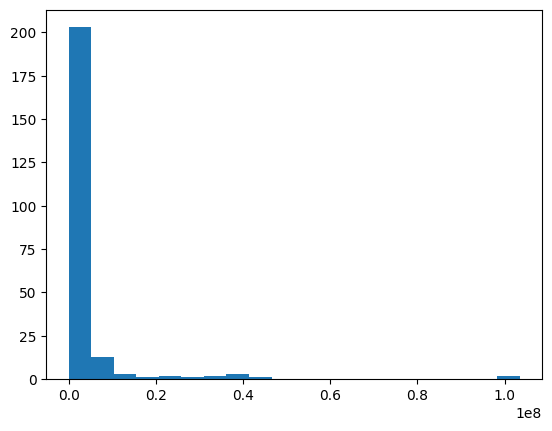

In [ ]:
# view the distribution of total cases
plt.hist(covidtotals.total_cases, bins=20)
plt.show()

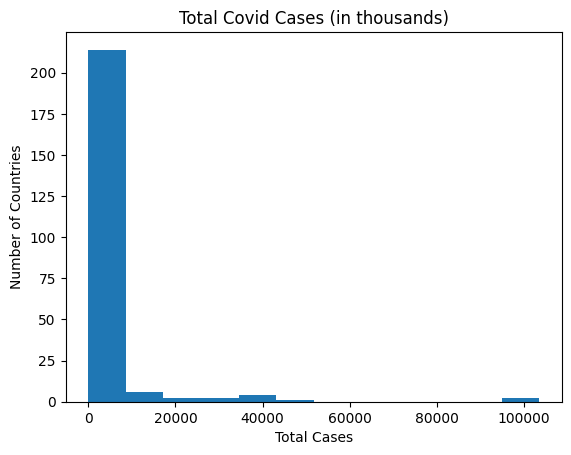

In [ ]:
# view the distribution of total cases
plt.hist(covidtotals['total_cases']/1000, bins=12)
plt.title("Total Covid Cases (in thousands)")
plt.xlabel("Total Cases")
plt.ylabel("Number of Countries")
plt.show()

## Using generative AI to display descriptive statistics
Generative AI tools provide data scientists with a great opportunity to streamline the data cleaning and exploration parts of our workflow. Large language models, in particular, have the potential to make this work much easier and more intuitive. Using these tools, we can select rows and columns by criteria, generate summary statistics, and plot variables.

A simple way to introduce generative AI tools into your data exploration is with PandasAI. PandasAI uses the OpenAI API to translate natural language queries into data selection and operations that pandas can understand. As of July 2023, OpenAI is the only large language model API that can be used with PandasAI, though the developers of the library anticipate adding other APIs.

We can use PandasAI to substantially reduce the lines of code we need to write to produce some of the tabulations and visualizations we have created so far in this chapter. The steps in this recipe show how you can do that.

In [ ]:
!pip install pandasai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.7/193.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 776.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 885.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# import pandas, numpy, and matplotlib
import pandas as pd
#import matplotlib.pyplot as plt
from pandasai.llm.openai import OpenAI
from pandasai import SmartDataframe

In [ ]:
pd.set_option('display.width', 70)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:,.0f}'.format

covidtotals = pd.read_csv("/content/drive/MyDrive/_Python/Python-Data-Cleaning/3. TakingMeasureOfData/data/covidtotals.csv",
                          parse_dates=['lastdate'])
covidtotals.set_index("iso_code", inplace=True)

In [22]:
# add api key
llm = OpenAI(api_token="...")
type(llm)

pandasai.llm.openai.OpenAI

In [ ]:
covidtotalssdf = SmartDataframe(covidtotals, config={"llm": llm})
type(covidtotalssdf)

pandasai.smart_dataframe.SmartDataframe

In [ ]:
covidtotalssdf.chat("Show me some information about the data")

ERROR:pandasai.helpers.logger:Pipeline failed on step 3: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.11/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandasai/pipelines/chat/code_generator.py", line 33, in execute
    code = pipeline_context.config.llm.generate_code(input, 

"Unfortunately, I was not able to answer your question, because of the following error:\n\nError code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}\n"

In [ ]:
covidtotals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231 entries, AFG to ZWE
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   lastdate         231 non-null    datetime64[ns]
 1   location         231 non-null    object        
 2   total_cases      231 non-null    float64       
 3   total_deaths     231 non-null    float64       
 4   total_cases_pm   231 non-null    float64       
 5   total_deaths_pm  231 non-null    float64       
 6   population       231 non-null    int64         
 7   pop_density      209 non-null    float64       
 8   median_age       194 non-null    float64       
 9   gdp_per_capita   191 non-null    float64       
 10  hosp_beds        170 non-null    float64       
 11  vac_per_hund     13 non-null     float64       
 12  aged_65_older    188 non-null    float64       
 13  life_expectancy  227 non-null    float64       
 14  hum_dev_ind      187 non-null    float64     

In [ ]:
covidtotals.head()

,lastdate,location,total_cases,...,life_expectancy,hum_dev_ind,region
iso_code,,,,,,,
AFG,2024-02-04,Afghanistan,"231,539",...,65,1,South Asia
ALB,2024-01-28,Albania,"334,863",...,79,1,Eastern Europe
DZA,2023-12-03,Algeria,"272,010",...,77,1,North Africa
ASM,2023-09-17,American Samoa,"8,359",...,74,NaN,Oceania / Aus
AND,2023-05-07,Andorra,"48,015",...,84,1,Western Europe


### When we use OpenAI API

- We can do this by passing natural language instructions to the SmartDataframe’s chat method:
`covidtotalssdf.chat("Show me some information about the data")`
- It is also straightforward to see the first few rows:
`covidtotalssdf.chat("Show first five rows.")`
- We can see which locations (countries) have the highest total cases:
`covidtotalssdf.chat("Show total cases for locations with the five most total cases.")`
- We can show the highest total cases per million as well, and also show other columns.
Notice that we do not need to add the underscores in total_cases_pm or total_deaths_pm. The chat method figures out that that is what we meant:
`covidtotalssdf.chat("Show total cases pm, total deaths pm, and location for locations with the 10 highest total cases pm.")`
- We can also create a SmartDataframe with selected columns. When we use the chat method in this step, it figures out that a SmartDataframe should be returned:
`covidtotalsabb = covidtotalssdf.chat("Select total cases pm, total deaths pm, and location.")`
`type(covidtotalsabb)`
`pandasai.smart_dataframe.SmartDataframe`
`covidtotalsabb`
- We do not need to be very precise in the language we pass to PandasAI. Instead of writing Select, we could have written Get or Grab:
`covidtotalsabb = covidtotalssdf.chat("Grab total cases pm, total deaths pm, and location.")`
`covidtotalsabb`
- We can select rows by summary statistic. For example, we can choose those rows where the total cases per million is greater than the 95th percentile. Note that this might take a little while to run on your machine:
`covidtotalssdf.chat("Show total cases pm and location where total cases pm greater than 95th percentile.")`
- We can see how continuous variables are distributed by asking for their distribution:
`covidtotalssdf.chat("Summarize values for total cases pm and total deaths pm.").T`
- We can also get group totals. Let’s get the total cases and deaths by region:
`covidtotalssdf.chat("Show sum of total cases and total deaths by region.")`
- We can easily generate plots on the COVID-19 data:
`covidtotalssdf.chat("Plot the total_cases_pm column data distribution")`
- We can also generate a scatterplot. Let’s look at total cases per million against total deaths per million:
`covidtotalssdf.chat( "Plot total cases pm values against total deaths pm values")`
- We can indicate which plotting tool we want to use. Using regplot here might be helpful to give us a better sense of the relationship between cases and deaths:
`covidtotalssdf.chat("Use regplot to show total deaths pm against total cases pm")`
- The extreme values for cases or deaths make it harder to visualize the relationship between the two for much of the range. Let’s also ask PandasAI to remove the extreme values:
`covidtotalssdf.chat("Use regplot to show total deaths pm against total cases pm without extreme values")`


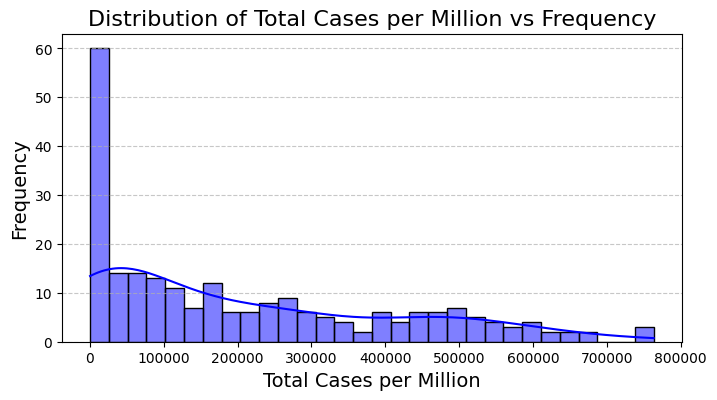

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the data distribution
plt.figure(figsize=(8, 4))
sns.histplot(data=covidtotals, x="total_cases_pm", kde=True, bins=30, color="blue")
# Add title and labels
plt.title("Distribution of Total Cases per Million vs Frequency", fontsize=16)
plt.xlabel("Total Cases per Million", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add gridlines for better readability
plt.show()

- Key Observations:
	- The distribution is right-skewed, meaning most countries have low total cases per million, with only a few countries having extremely high values.
	- The peak at the start shows a significant number of countries with very low total_cases_pm.
- Insights:
	- This indicates a highly imbalanced dataset where the majority of countries experienced fewer cases per million compared to a smaller subset with very high cases.

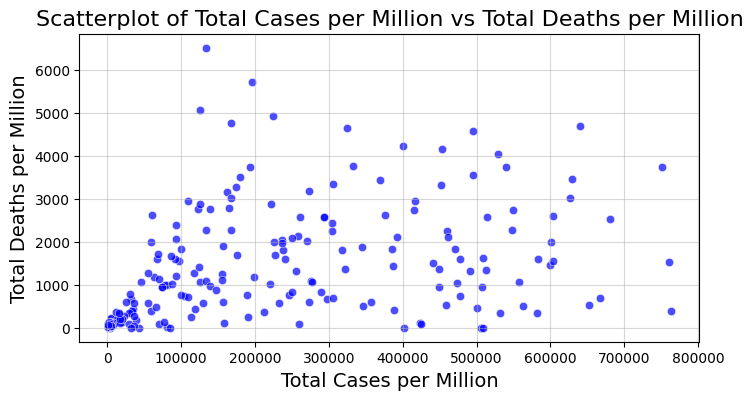

In [ ]:
# Scatterplot of total cases per million vs total deaths per million
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=covidtotals,
    x="total_cases_pm",
    y="total_deaths_pm",
    color="blue",
    alpha=0.7
)
# Add title and labels
plt.title("Scatterplot of Total Cases per Million vs Total Deaths per Million", fontsize=16)
plt.xlabel("Total Cases per Million", fontsize=14)
plt.ylabel("Total Deaths per Million", fontsize=14)

# Show gridlines for better readability
plt.grid(alpha=0.5)

# Display the plot
plt.show()

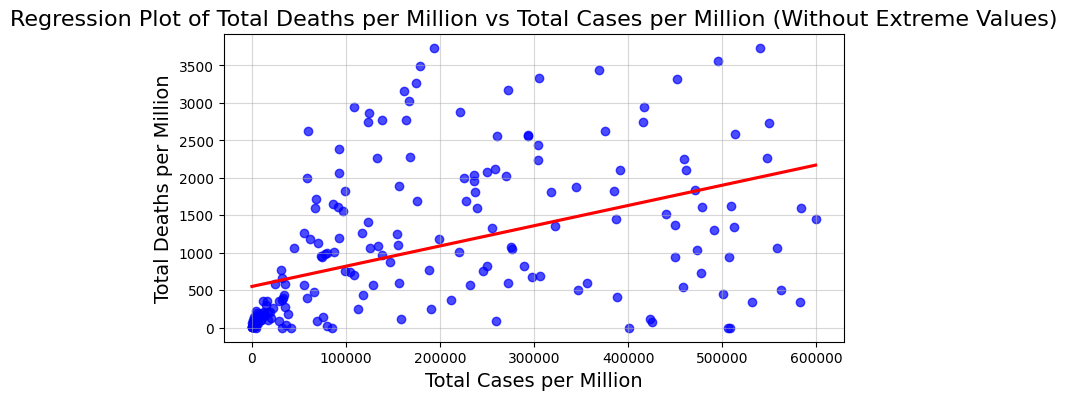

In [21]:
# Define a threshold for filtering out extreme values
# Example: Filter out rows where total_cases_pm or total_deaths_pm exceed the 95th percentile
threshold_cases = covidtotals["total_cases_pm"].quantile(0.95)
threshold_deaths = covidtotals["total_deaths_pm"].quantile(0.95)

# Filter the dataset to exclude extreme values
filtered_data = covidtotals[
    (covidtotals["total_cases_pm"] <= threshold_cases) &
    (covidtotals["total_deaths_pm"] <= threshold_deaths)
]

# Regression plot of total deaths per million vs total cases per million (without extreme values)
plt.figure(figsize=(8, 4))
sns.regplot(
    data=filtered_data,
    x="total_cases_pm",
    y="total_deaths_pm",
    scatter_kws={"alpha": 0.7, "color": "blue"},
    line_kws={"color": "red"},
    ci=None  # Removes confidence interval shading
)

# Add title and labels
plt.title("Regression Plot of Total Deaths per Million vs Total Cases per Million (Without Extreme Values)", fontsize=16)
plt.xlabel("Total Cases per Million", fontsize=14)
plt.ylabel("Total Deaths per Million", fontsize=14)

# Show gridlines for better readability
plt.grid(alpha=0.5)

# Display the plot
plt.show()

- Explanation:
	-	This is a scatterplot with a regression line, showing the relationship between total_cases_pm (x-axis) and total_deaths_pm (y-axis).
	-	Extreme values (e.g., top 5% of total_cases_pm and total_deaths_pm) have been excluded, creating a plot focused on the majority of the data.
-	Key Observations:
	-	The regression line (red) shows a positive correlation between total cases and total deaths per million.
	-	The scatter points are more concentrated around lower values, indicating fewer extreme cases in this subset.
	-	The relationship appears more linear after removing the extreme outliers.
-	Insights:
	-	Excluding extreme values helps reveal a clearer trend: as cases per million increase, deaths per million also tend to increase.

The 95th percentile means that 95% of the data is below or equal to the calculated threshold, while the top 5% (extreme values) are excluded.

### What Does the 95th Percentile Mean?
- The 95th percentile is a statistical measure that determines the value below which 95% of the data lies.
- In the context of your dataset:
  - For total_cases_pm: The threshold represents a value such that 95% of the countries/regions have fewer cases per million than that value, and the top 5% with the most cases per million are excluded.
  - Similarly, for total_deaths_pm, the threshold excludes the top 5% with the highest deaths per million.

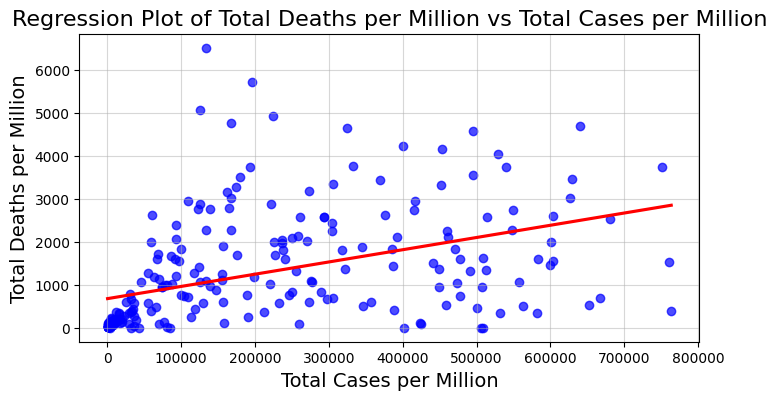

In [ ]:
# Regression plot of total deaths per million vs total cases per million
plt.figure(figsize=(8, 4))
sns.regplot(
    data=covidtotals,
    x="total_cases_pm",
    y="total_deaths_pm",
    scatter_kws={"alpha": 0.7, "color": "blue"},
    line_kws={"color": "red"},
    ci=None  # Removes the confidence interval shading
)
# Add title and labels
plt.title("Regression Plot of Total Deaths per Million vs Total Cases per Million", fontsize=16)
plt.xlabel("Total Cases per Million", fontsize=14)
plt.ylabel("Total Deaths per Million", fontsize=14)

# Show gridlines for better readability
plt.grid(alpha=0.5)

# Display the plot
plt.show()

This is a scatterplot with a regression line, showing the relationship between total_cases_pm (x-axis) and total_deaths_pm (y-axis) across the entire dataset.
- Key Observations:
	-	The regression line still shows a positive correlation between total cases and deaths per million.
	-	However, the scatter points are more dispersed due to the inclusion of extreme values (countries with very high cases and deaths).
	-	Some outliers with extremely high total_cases_pm or total_deaths_pm are visible, stretching the range.
-	Insights:
	-	Including extreme values slightly distorts the linear relationship, as the regression line is influenced by outliers.
	-	The positive trend is still evident but less consistent compared to the subset without extremes.